In [1]:
import pandas as pd
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.options import Options
from bs4 import BeautifulSoup
from datetime import datetime, timedelta  
import numpy as np
choice = input('Would you like to fetch data (1) or upload from a CSV file (2)? ')
dfs = [0,0]
if choice == '1':
    def grabtable(date,station):
        option = Options()

        option.headless = True
        driver = webdriver.Chrome(ChromeDriverManager().install(),options=option)
        #driver.get('http://www.wunderground.com/history/daily/KCABERKE272/date/2022-6-1')
        web = 'https://www.wunderground.com/dashboard/pws/{}/table/{}/{}/daily'
        #web = 'https://www.wunderground.com/history/daily/{}/date/{}'
        url = web.format(station,date,date)
        #driver.get(url)
        #KCABERKE272, 2022-6-1
        driver.implicitly_wait(100000)
        while True:
            try:
                driver.get(url)
                soup = BeautifulSoup(driver.page_source, 'lxml')
                tables = soup.find_all('table')
                driver.implicitly_wait(300)
                dfs = pd.read_html(str(tables),header=0)
            except:
                print("error occured retrying.")
            else:
                break
        print(f'Total tables: {len(dfs)}')
        #table = dfs[1]
        #table = table.iloc[list(range(25))]
        driver.quit()
        return dfs[3]
    indee = 0
    station1 = input('Enter station ID:')
    #
    dateformat = input('Enter date (YYYY-MM-DD): ')
    date = datetime.strftime(datetime.strptime(dateformat, '%Y-%M-%d'), "%Y-%-M-%-d")
    #date = input('Enter date (YYYY-M-D)')
    for values in ['station1']:
        #first value changed due to fetching errors.
        frame = grabtable(date,station1)
        frame['Temperature'] = frame['Temperature'].str.replace("°F","").astype(float)
        frame['Dew Point'] = frame['Dew Point'].str.replace("°F","").astype(float)
        frame['Gust'] = frame['Gust'].str.replace("°mph","").astype(float)
        frame['Speed'] = frame['Speed'].str.replace("°mph","").astype(float)
        #frame['Percip. Rate'] = frame['Percip. Rate'].str.replace("°in","").astype(float)
        frame['Humidity'] = frame['Humidity'].str.replace("°%","").astype(float)
        frame['Pressure'] = frame['Pressure'].str.replace("°in","").astype(float)
        #frame['Precipaccum.'] = frame['Precipaccum.'].str.replace("°in","").astype(float)
        dfs[indee] = frame
elif choice == '2':
    dateformat = input('Enter date (YYYY-MM-DD): ')
    date = datetime.strftime(datetime.strptime(dateformat, '%Y-%M-%d'), "%Y-%-M-%-d")
    newdirec = input('enter file path of csv file:')
    frame = pd.read_csv(newdirec)
    frame = frame.loc[1:len(frame.index)]
    dfs[0] = frame
direc = input('Enter (dosenet) CSV file path: ')
    
    
    
varia = input("What do you want to graph? (x-axis): ")
varia2 = input("What do you want to graph? (y-axis): ")
df = pd.DataFrame()
choppedDF = pd.DataFrame()
frameOne = dfs[0]
frameOne.drop(index=frameOne.index[0], axis=0, inplace=True)
#### FORMATTING
#frameOne.drop(index=frameOne.index[0], axis=0, inplace=True)
#### FORMATTING
frameOne['Time'] = frameOne['Time'].apply(lambda x: datetime.strftime(datetime.strptime(x, '%I:%M %p'), "%H:%M"))
frameOne['Time'] = frameOne['Time'].apply(lambda x: datetime.strptime(dateformat + " " + x, '%Y-%m-%d %H:%M').strftime("%s"))
frameOne = frameOne.reset_index()
col0 = frameOne['Time']
col1 = frameOne[varia.capitalize()]
df.insert(0, varia.lower(), col1)
df.insert(0,'time',col0)
choppedDF = df.loc[1:167]
choppedDF = choppedDF.dropna()
dosenetframe = pd.read_csv(direc)
formattedDNFrame = dosenetframe[dosenetframe['deviceTime_local'].str.contains(dateformat, regex=False)]
print('CHECK ONE')
print(twoetchnew)  
#twoetchnew['deviceTime_newlocal'] = twoetchnew['deviceTime_unix']
#.apply(lambda x: datetime.fromtimestamp(x).strftime("%H:%M"))                                                                                                                                                                                         
                                                                                                                           
#twoetchnew = twoetchnew.drop('deviceTime_utc', axis = 1) 
#twoetchnew = twoetchnew.drop('deviceTime_local', axis = 1)
formattedDNFrame = formattedDNFrame.rename(columns = {"deviceTime_unix":"time"})
print('CHECK TWO')
#print(twoetchnew)
#twoetchnew['time'] = twoetchnew['time'].str.split().str[1]
#twoetchnew.drop(index=twoetchnew.index[0], axis=0, inplace=True)
twoetch = formattedDNFrame.reset_index()
formattedDNFrame = twoetch.loc[1:len(newnewdf.index)]
#print(twoetchnew)
#twoetchnew = twoetchnew.loc[1:167]
frameOne = formattedDNFrame
frameTwo = choppedDF
#newnewdf = newdf.loc[1:167]
tofaren = lambda x: (x*1.8)+32

#  (*********************************
#### BINNING DATA - FROM LABMETHODS.PY -----


data1 = frameOne
data2 = frameTwo
data1 = data1.set_index(['time'])
data1.index = pd.to_datetime(data1.index, unit='s')
data2 = data2.set_index(['time'])
data2.index = pd.to_datetime(data2.index, unit='s')

rebin = 5
data1_binned = data1.resample(str(rebin)+"T", label='right').mean().reset_index()
data2_binned = data2.resample(str(rebin)+"T", label='right').mean().reset_index()
   
if len(data1_binned) > len(data2_binned):
    data1_binned = data1_binned.drop(data1_binned.index[len(data2_binned):])
elif len(data2_binned) > len(data1_binned):
    data2_binned = data2_binned.drop(data2_binned.index[len(data1_binned):])

inds1 = pd.isnull(data1_binned).any(1).to_numpy().nonzero()[0]
inds2 = pd.isnull(data2_binned).any(1).to_numpy().nonzero()[0]

indsnan = np.concatenate([inds1,inds2])
indsnan = np.unique(indsnan)

j = len(indsnan)-1

while (j>=0):
    data1_binned = data1_binned.drop(data1_binned.index[indsnan[j]])
    data2_binned = data2_binned.drop(data2_binned.index[indsnan[j]])
    j = j-1
    
frameOne = data1_binned
frameTwo = data2_binned

col0 = frameOne['time']
frameOne[varia2.lower()] = frameOne[varia2.lower()].astype(float)
frameTwo[varia.lower()] = frameTwo[varia.lower()].astype(float)
col1 = frameOne[varia2.lower()]
col2 = frameTwo[varia.lower()]
newdf.insert(0, varia.capitalize(), col1)
newdf.insert(1, varia2.lower(), col2)
newdf.insert(2,'Time',col0)
newdf['x1-x2'] = newdf[varia.capitalize()] - newdf[varia2.lower()]
sumtemps = newdf['x1-x2'].sum()
newdf["(x1-x2)^2"] = newdf['x1-x2'].apply(lambda x: x**2)
squaredtemps = newdf['(x1-x2)^2'].sum()
tval = (sumtemps/len(newdf.index))/((squaredtemps-(squaredtemps/len(newdf.index)))/((len(newdf.index)-1)*len(newdf.index))**0.5)
pval = stats.t.sf(abs(tval), df=(len(newdf['(x1-x2)^2'])-1))*2
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

X = newdf.iloc[:, 0].values.reshape(-1, 1)
Y = newdf.iloc[:, 1].values.reshape(-1, 1) 
X = tofaren(X)
linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X) 
plt.scatter(X, Y, color='g')
plt.plot(X, Y_pred, color='k')
plt.show()
# 2022-06-08

#print("X-axis:Etcheverry Roof Data")
#print("Y-axis: WUnderground Station #KCABERKE108")

Would you like to fetch data (1) or upload from a CSV file (2)? 1
Enter station ID:KCABERKE108
Enter date (YYYY-MM-DD): 2022-06-08



[WDM] - ====== WebDriver manager ======
[WDM] - Current google-chrome version is 104.0.5112
[WDM] - Get LATEST chromedriver version for 104.0.5112 google-chrome
[WDM] - About to download new driver from https://chromedriver.storage.googleapis.com/104.0.5112.79/chromedriver_mac64.zip
[WDM] - Driver has been saved in cache [/Users/user/.wdm/drivers/chromedriver/mac64/104.0.5112.79]
<ipython-input-1-5a5d2667d34d>:15: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager().install(),options=option)


Total tables: 4
Enter (dosenet) CSV file path: /Users/user/Downloads/etch_roof_weather.csv
What do you want to graph? (x-axis): Temperature
What do you want to graph? (y-axis): temperature
CHECK ONE


NameError: name 'twoetchnew' is not defined

#  /Users/user/Downloads/rain2022-07-21.csv
# /Users/user/Desktop/stationdata.csv
# /Users/user/Downloads/uw.csv
# enter file path of csv file:/Users/user/Desktop/stationdata.csv
# Enter (dosenet) CSV file path: /Users/user/Downloads/rain2022-07-21.csv

In [21]:
col0 = frameOne['time']
frameOne[varia2.lower()] = frameOne[varia2.lower()].astype(float)
frameTwo[varia.lower()] = frameTwo[varia.lower()].astype(float)

#print(frameTwo['Temperature1'])

col1 = frameOne[varia2.lower()]
col2 = frameTwo[varia.lower()]
#print(col0)
#print(frameTwo['Pressure1'])
#print(frameTwo['Temperature1'])
#newdf.insert(0, 'newtemp', col1)
#newdf.insert(1, 'newnewtemp', col2)
newdf.insert(2,'newnewtime',col0)
#newdf = newdf.drop(0)
#newdf = newdf.drop(0)
#newdf = newdf.drop(148)
newdf['x1-x2'] = newdf[varia.capitalize()] - newdf[varia2.lower()]
sumtemps = newdf['x1-x2'].sum()
newdf["(x1-x2)^2"] = newdf['x1-x2'].apply(lambda x: x**2)
squaredtemps = newdf['(x1-x2)^2'].sum()
tval = (sumtemps/len(newdf.index))/((squaredtemps-(squaredtemps/len(newdf.index)))/((len(newdf.index)-1)*len(newdf.index))**0.5)
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

X = newdf.iloc[:, 0].values.reshape(-1, 1)
Y = newdf.iloc[:, 1].values.reshape(-1, 1) 
X = tofaren(X)
linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X) 
plt.scatter(X, Y, color='g')
plt.plot(X, Y_pred, color='k')
plt.show()

ValueError: cannot insert newnewtime, already exists

In [20]:
tval

nan

In [4]:
data2_binned

,time,temperature
0,2022-03-20 07:15:00,46.9
1,2022-03-20 07:20:00,46.9
2,2022-03-20 07:25:00,46.9
3,2022-03-20 07:30:00,46.8
4,2022-03-20 07:35:00,46.8
...,...,...
162,2022-03-20 20:45:00,65.7
163,2022-03-20 20:50:00,66.0
164,2022-03-20 20:55:00,66.2
165,2022-03-20 21:00:00,66.7


In [13]:
from datetime import datetime, timedelta  
dateformat = input('Enter date (YYYY-MM-DD): ')
datetime.strftime(datetime.strptime(dateformat, '%Y-%M-%d'), "%Y-%-M-%-d")

Enter date (YYYY-MM-DD): 2022-03-01


'2022-3-1'

In [2]:
dfs[0]

,Time,Temperature,Dew Point,Humidity,Wind,Speed,Gust,Pressure,Precip. Rate.,Precip. Accum.,UV,Solar
2,1647846540,47.1,44.7,91.0,NNW,2.3,5.0,29.80,0.00 °in,0.00 °in,NaN,w/m²
3,1647846840,46.9,44.7,92.0,NW,2.9,6.3,29.80,0.00 °in,0.00 °in,NaN,w/m²
4,1647847140,46.9,44.4,91.0,NNW,3.4,6.5,29.80,0.00 °in,0.00 °in,NaN,w/m²
5,1647847440,46.9,44.4,91.0,NNW,2.4,6.0,29.80,0.00 °in,0.00 °in,NaN,w/m²
6,1647847740,46.8,44.3,91.0,NNW,1.3,5.4,29.80,0.00 °in,0.00 °in,NaN,w/m²
...,...,...,...,...,...,...,...,...,...,...,...,...
284,1647931140,51.6,46.0,81.0,NE,0.0,0.9,30.01,0.00 °in,0.00 °in,NaN,w/m²
285,1647931440,51.4,46.0,81.0,NE,0.0,0.2,30.01,0.00 °in,0.00 °in,NaN,w/m²
286,1647931740,51.3,46.1,82.0,North,0.3,1.4,30.01,0.00 °in,0.00 °in,NaN,w/m²
287,1647932040,51.3,46.0,82.0,North,1.2,2.3,30.02,0.00 °in,0.00 °in,NaN,w/m²


In [6]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

corDF = pd.DataFrame()

xmean = np.mean(X)
ymean = np.mean(Y)
pd.to_numeric(ymean, errors='ignore')
corDF['xycov'] = (X - xmean)
corDF['xvar'] = (X - xmean)**2

beta = corDF['xycov'].sum() / corDF['xvar'].sum()
alpha = ymean-(beta*xmean)
ypred = alpha + beta * X

plt.figure(figsize = (12,6))
plt.plot(X,ypred)
plt.plot(X,Y,'ro')
plt.title('Act v. Pred.')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


ValueError: Cannot set a frame with no defined index and a value that cannot be converted to a Series

In [23]:
X = pd.DataFrame(X,columns = ['X'])
Y = pd.DataFrame(Y,columns = ['Y'])

In [18]:
mewdf[1] = mewdf2

In [69]:
hey = beta*xmean

type(ymean)

In [73]:
ymean

Y    5.146108
dtype: float64

X   NaN
Y   NaN
dtype: float64

In [75]:
"""
TO DO:
* Create a better looking linear regression model,
correlation coefficient, correlation matrix (maybe), std deviation, etc
* Then, present data in a nice, orderly manner.
* Don't forget to mention stations, data sources, etc.
* Try to find a conclusion in your data? Not just a "weather correlation."
* Check DM for more ideas. 

"""

In [5]:
v

     index             deviceTime_utc                       time  \
1        1  2019-05-31 21:50:13+00:00  2019-05-31 14:50:13-07:00   
2        2  2019-05-31 21:55:13+00:00  2019-05-31 14:55:13-07:00   
3        3  2019-05-31 22:00:13+00:00  2019-05-31 15:00:13-07:00   
4        4  2019-05-31 22:05:13+00:00  2019-05-31 15:05:13-07:00   
5        5  2019-05-31 22:10:13+00:00  2019-05-31 15:10:13-07:00   
..     ...                        ...                        ...   
163    163  2019-06-01 11:20:13+00:00  2019-06-01 04:20:13-07:00   
164    164  2019-06-01 11:25:13+00:00  2019-06-01 04:25:13-07:00   
165    165  2019-06-01 11:30:13+00:00  2019-06-01 04:30:13-07:00   
166    166  2019-06-01 11:35:13+00:00  2019-06-01 04:35:13-07:00   
167    167  2019-06-01 11:40:13+00:00  2019-06-01 04:40:13-07:00   

     deviceTime_unix  cpm  cpmError  error_flag  
1       1.559339e+09  2.2  0.663325         NaN  
2       1.559340e+09  3.2  0.800000         NaN  
3       1.559340e+09  2.8  0.7483

ValueError: unit='s' not valid with non-numerical val='('2019-05-31 14:50:13-07:00', 1559339413.0)'

In [3]:
tval

-0.43937254793344344

In [36]:
data1_binned['count'].values.tolist()

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 6.0,
 3.0,
 5.0,
 3.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [30]:
varia2 = 'count'

In [11]:
frameOne

,time,index,level_0,level_1,temperature,bbb
0,1970-01-01 00:05:00,84.5,1.658412e+09,15.625705,999.633271,113.870084


In [13]:
list(frame)

['Time',
 'Temperature',
 'Dewpoint',
 'Humidity',
 'Wind',
 'Speed',
 'Gust',
 'Pressure',
 'Precip. Rate.',
 'Precipaccum.',
 'UV',
 'Solar']

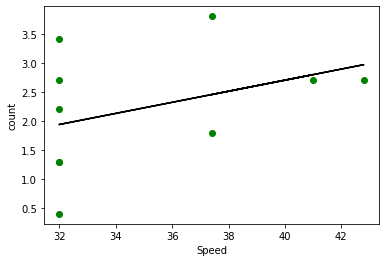

In [27]:
X = newdf.iloc[120:130, 0].values.reshape(-1, 1)
Y = newdf.iloc[120:130, 1].values.reshape(-1, 1) 
X = tofaren(X)
linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X) 
plt.scatter(X, Y, color='g')
plt.plot(X, Y_pred, color='k')
plt.xlabel(varia)
plt.ylabel(varia2)
plt.show()


In [1]:
tval

NameError: name 'tval' is not defined

In [19]:
newdf.iloc[120:130, 0]

122    0.0
123    0.0
124    0.0
125    6.0
126    3.0
127    5.0
128    3.0
129    0.0
130    0.0
131    0.0
Name: Precipaccum., dtype: float64

In [16]:
data1_binned

,time,level_0,index,count
0,2022-07-21 07:10:00,1.0,1.0,0.0
1,2022-07-21 07:15:00,2.0,2.0,0.0
2,2022-07-21 07:20:00,3.0,3.0,0.0
3,2022-07-21 07:25:00,4.0,4.0,0.0
4,2022-07-21 07:30:00,5.0,5.0,0.0
...,...,...,...,...
162,2022-07-21 20:40:00,161.0,161.0,0.0
163,2022-07-21 20:45:00,162.0,162.0,0.0
164,2022-07-21 20:50:00,163.0,163.0,0.0
165,2022-07-21 20:55:00,164.0,164.0,0.0


In [4]:
frame

,Time,Temperature,Dew Point,Humidity,Wind,Speed,Gust,Pressure,Precip. Rate.,Precip. Accum.,UV,Solar
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12:04 AM,57.3 °F,51.5 °F,81 °%,South,0.0 °mph,0.7 °mph,29.78 °in,0.00 °in,0.00 °in,NaN,w/m²
2,12:09 AM,57.0 °F,51.5 °F,82 °%,South,0.0 °mph,1.3 °mph,29.78 °in,0.00 °in,0.00 °in,NaN,w/m²
3,12:14 AM,56.7 °F,51.4 °F,83 °%,South,0.5 °mph,2.2 °mph,29.78 °in,0.00 °in,0.00 °in,NaN,w/m²
4,12:18 AM,56.3 °F,51.4 °F,83 °%,South,0.0 °mph,1.7 °mph,29.78 °in,0.00 °in,0.00 °in,NaN,w/m²
...,...,...,...,...,...,...,...,...,...,...,...,...
280,11:39 PM,58.9 °F,52.2 °F,78 °%,SW,0.0 °mph,0.0 °mph,29.66 °in,0.00 °in,0.00 °in,NaN,w/m²
281,11:44 PM,58.6 °F,52.0 °F,79 °%,SW,0.0 °mph,0.2 °mph,29.66 °in,0.00 °in,0.00 °in,NaN,w/m²
282,11:49 PM,58.5 °F,51.7 °F,78 °%,SW,0.0 °mph,0.0 °mph,29.66 °in,0.00 °in,0.00 °in,NaN,w/m²
283,11:54 PM,58.3 °F,51.4 °F,78 °%,SW,0.0 °mph,0.0 °mph,29.66 °in,0.00 °in,0.00 °in,NaN,w/m²


In [1]:

import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import pandas as pd
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.options import Options
from bs4 import BeautifulSoup
from datetime import datetime, timedelta
import numpy as np
# def timeCheck(x):
#     newframe = pd.DataFrame(columns=['timeTwo', 'timeOne'])
#     unacceptable = False
#     for values in range(len(x.index)):
#         row = checktime.iloc[[values]]
#         for rowvalues in row.values:
#             if ((rowvalues[0] - rowvalues[1]) > 300):
#                 unacceptable = True
#                 print('creating new list of times.')
#                 #print('DEVIATION OF TIME IS UNACCEPTABLE. (EXCEEDING -5,5 RANGE))')
#             else:
#                 newframe = pd.concat([pd.DataFrame(row, columns=newframe.columns), newframe], ignore_index=True)
#                 #newframe = newframe.append(row, ignore_index=True)
#                 continue
#                 #unacceptable = True
#                 #print('ACCEPTABLE TIME DEVIATION (WITHING -5 to 5).')
#     if unacceptable == True:
#         print('DEVIATION OF TIME IS UNACCEPTABLE. (EXCEEDING -5,5 RANGE))')
#         return newframe
#     else:
#         print('ACCEPTABLE TIME DEVIATION (WITHING -5 to 5).')
#         return 0

choice = input(
    'Would you like to fetch data (1) or upload from a CSV file (2)? ')
dfs = [0, 0]
if choice == '1':
    def grabtable(date, station):
        option = Options()

        option.headless = True
        driver = webdriver.Chrome(
            ChromeDriverManager().install(), options=option)
        # driver.get('http://www.wunderground.com/history/daily/KCABERKE272/date/2022-6-1')
        web = 'https://www.wunderground.com/dashboard/pws/{}/table/{}/{}/daily'
        #web = 'https://www.wunderground.com/history/daily/{}/date/{}'
        url = web.format(station, date, date)
        # driver.get(url)
        #KCABERKE272, 2022-6-1
        driver.implicitly_wait(100000)
        while True:
            try:
                driver.get(url)
                soup = BeautifulSoup(driver.page_source, 'lxml')
                tables = soup.find_all('table')
                driver.implicitly_wait(300)
                dfs = pd.read_html(str(tables), header=0)
            except:
                print("error occured retrying.")
            else:
                break
        print(f'Total tables: {len(dfs)}')
        #table = dfs[1]
        #table = table.iloc[list(range(25))]
        driver.quit()
        return dfs[3]
    indee = 0
    station1 = input('Enter station ID:')
    date = input('Enter date (YYYY-M-D)')
    dateformat = input('Enter date again, but (YYYY-MM-DD)')
    for values in ['station1']:
        # first value changed due to fetching errors.
        frame = grabtable(date, station1)
        #frame = frame[frame.Temperature != '--']
        frame['Temperature'] = frame['Temperature'].str.replace(
            "°F", "").astype(float)
        #frame = frame[frame.Humidity != '--']
        #frame = frame[frame.Pressure != '--']
        frame['Dew Point'] = frame['Dew Point'].str.replace(
            "°F", "").astype(float)
        frame['Gust'] = frame['Gust'].str.replace("°mph", "").astype(float)
        frame['Speed'] = frame['Speed'].str.replace("°mph", "").astype(float)
        #frame['Percip. Rate'] = frame['Percip. Rate'].str.replace("°in","").astype(float)
        frame['Humidity'] = frame['Humidity'].str.replace(
            "°%", "").astype(float)
        frame['Pressure'] = frame['Pressure'].str.replace(
            "°in", "").astype(float)
        dfs[indee] = frame
elif choice == '2':
    date = input('Enter date of date (YYYY-M-D)')
    dateformat = input('Enter date again, but (YYYY-MM-DD)')
    newdirec = input('enter file path of csv file:')
    frame = pd.read_csv(newdirec)
    frame = frame.loc[1:len(frame.index)]
    dfs[0] = frame
direc = input('Enter (dosenet) CSV file path: ')


varia = input("What do you want to graph? (x-axis): ")
varia2 = input("What do you want to graph? (y-axis): ")
newdf = pd.DataFrame()
df = pd.DataFrame()
choppedDF = pd.DataFrame()
frameOne = dfs[0]
frameOne.drop(index=frameOne.index[0], axis=0, inplace=True)
# FORMATTING
#frameOne.drop(index=frameOne.index[0], axis=0, inplace=True)
# FORMATTING
frameOne['Time'] = frameOne['Time'].apply(
    lambda x: datetime.strftime(datetime.strptime(x, '%I:%M%p'), "%H:%M"))
frameOne['Time'] = frameOne['Time'].apply(lambda x: datetime.strptime(
    dateformat + " " + x, '%Y-%m-%d %H:%M').strftime("%s"))
frameOne = frameOne.reset_index()
col0 = frameOne['Time']
col1 = frameOne[varia.capitalize()]
df.insert(0, varia.lower(), col1)
df.insert(0, 'time', col0)
#df = newdf.drop(0)
#df = newdf.drop(148)
choppedDF = df.loc[1:167]
choppedDF = choppedDF.dropna()
etchroof = pd.read_csv(direc)
twoetchnew = etchroof[etchroof['deviceTime_local'].str.contains(
    dateformat, regex=False)]
print('CHECK ONE')
print(twoetchnew)
#twoetchnew['deviceTime_newlocal'] = twoetchnew['deviceTime_unix']
# .apply(lambda x: datetime.fromtimestamp(x).strftime("%H:%M"))

#twoetchnew = twoetchnew.drop('deviceTime_utc', axis = 1)
#twoetchnew = twoetchnew.drop('deviceTime_local', axis = 1)
twoetchnew = twoetchnew.rename(columns={"deviceTime_unix": "time"})
print('CHECK TWO')
# print(twoetchnew)
#twoetchnew['time'] = twoetchnew['time'].str.split().str[1]
#twoetchnew.drop(index=twoetchnew.index[0], axis=0, inplace=True)
twoetch = twoetchnew.reset_index()
twoetchnew = twoetch.loc[1:len(choppedDF.index)]
# print(twoetchnew)
#twoetchnew = twoetchnew.loc[1:167]
frameOne = twoetchnew
frameTwo = choppedDF
#newnewdf = newdf.loc[1:167]
def tofaren(x): return (x*1.8)+32

#  (*********************************
# BINNING DATA - FROM LABMETHODS.PY -----


data1 = frameOne
data2 = frameTwo
data1 = data1.set_index(['time'])
data1.index = pd.to_datetime(data1.index, unit='s')
data2 = data2.set_index(['time'])
data2.index = pd.to_datetime(data2.index, unit='s')

rebin = 5
data1_binned = data1.resample(
    str(rebin)+"T", label='right').mean().reset_index()
data2_binned = data2.resample(
    str(rebin)+"T", label='right').mean().reset_index()

if len(data1_binned) > len(data2_binned):
    data1_binned = data1_binned.drop(data1_binned.index[len(data2_binned):])
elif len(data2_binned) > len(data1_binned):
    data2_binned = data2_binned.drop(data2_binned.index[len(data1_binned):])

inds1 = pd.isnull(data1_binned).any(1).to_numpy().nonzero()[0]
inds2 = pd.isnull(data2_binned).any(1).to_numpy().nonzero()[0]

indsnan = np.concatenate([inds1, inds2])
indsnan = np.unique(indsnan)

j = len(indsnan)-1
while (j >= 0):
    data1_binned = data1_binned.drop(data1_binned.index[indsnan[j]])
    data2_binned = data2_binned.drop(data2_binned.index[indsnan[j]])
    j = j-1

frameOne = data1_binned
frameTwo = data2_binned

#  ****************************)
""" 
checktime = pd.DataFrame()
checktime.insert(0, 'timeOne', frameOne['time'])
checktime.insert(0, 'timeTwo', col0)
checktime['timeOne'] = checktime['timeOne'].apply(lambda x: int(x))
checktime['timeTwo'] =checktime['timeTwo'].apply(lambda x: int(x))
xyz = timeCheck(checktime)
if (xyz == 0):
    pass
else:
    frameOne = frameOne.loc[1:len(xyz.index)]
    frameTwo = frameTwo.loc[1:len(xyz.index)]
    print('times adjusted...')
"""
col0 = frameOne['time']
frameOne[varia2.lower()] = frameOne[varia2.lower()].astype(float)
frameTwo[varia.lower()] = frameTwo[varia.lower()].astype(float)

# print(frameTwo['Temperature1'])

col1 = frameOne[varia2.lower()]
col2 = frameTwo[varia.lower()]
# print(col0)
# print(frameTwo['Pressure1'])
# print(frameTwo['Temperature1'])
newdf.insert(0, varia.capitalize(), col1)
newdf.insert(1, varia2.lower(), col2)
newdf.insert(2, 'Time', col0)
#newdf = newdf.drop(0)
#newdf = newdf.drop(0)
#newdf = newdf.drop(148)
newdf['x1-x2'] = newdf[varia.capitalize()] - newdf[varia2.lower()]
sumtemps = newdf['x1-x2'].sum()
newdf["(x1-x2)^2"] = newdf['x1-x2'].apply(lambda x: x**2)
squaredtemps = newdf['(x1-x2)^2'].sum()
tval = (sumtemps/len(newdf.index))/((squaredtemps-(squaredtemps /
                                                   len(newdf.index)))/((len(newdf.index)-1)*len(newdf.index))**0.5)

X = newdf.iloc[:, 0].values.reshape(-1, 1)
Y = newdf.iloc[:, 1].values.reshape(-1, 1)
X = tofaren(X)


linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()
#print("X-axis:Etcheverry Roof Data")
# print("Y-axis: WUnderground Station #KCABERKE108")


Would you like to fetch data (1) or upload from a CSV file (2)? 2
Enter date of date (YYYY-M-D)2022-7-21
Enter date again, but (YYYY-MM-DD)2022-07-21
enter file path of csv file:/Users/user/Desktop/stationdatarain.csv
Enter (dosenet) CSV file path: /Users/user/Downloads/rain2022-07-21.csv
What do you want to graph? (x-axis): Speed
What do you want to graph? (y-axis): count


AttributeError: Can only use .str accessor with string values!

In [ ]:
col0 = frameOne['time']
frameOne[varia2.lower()] = frameOne[varia2.lower()].astype(float)
frameTwo[varia.lower()] = frameTwo[varia.lower()].astype(float)

# print(frameTwo['Temperature1'])

col1 = frameOne[varia2.lower()]
col2 = frameTwo[varia.lower()]
# print(col0)
# print(frameTwo['Pressure1'])
# print(frameTwo['Temperature1'])
newdf.insert(0, varia.capitalize(), col1)
newdf.insert(1, varia2.lower(), col2)
newdf.insert(2, 'Time', col0)
#newdf = newdf.drop(0)
#newdf = newdf.drop(0)
#newdf = newdf.drop(148)
newdf['x1-x2'] = newdf[varia.capitalize()] - newdf[varia2.lower()]
sumtemps = newdf['x1-x2'].sum()
newdf["(x1-x2)^2"] = newdf['x1-x2'].apply(lambda x: x**2)
squaredtemps = newdf['(x1-x2)^2'].sum()
tval = (sumtemps/len(newdf.index))/((squaredtemps-(squaredtemps /
                                                   len(newdf.index)))/((len(newdf.index)-1)*len(newdf.index))**0.5)

X = newdf.iloc[:, 0].values.reshape(-1, 1)
Y = newdf.iloc[:, 1].values.reshape(-1, 1)
X = tofaren(X)

linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()
#print("X-axis:Etcheverry Roof Data")
# print("Y-axis: WUnderground Station #KCABERKE108")

In [6]:
frame = frame[frame.Temperature != '--']
frame = frame[frame.Pressure != '--']

In [7]:
list(data2)

['temperature']

In [19]:
#####

In [7]:
tval

0.0010376822205146463

In [13]:
frame

,Time,Temperature,Dew Point,Humidity,Wind,Speed,Gust,Pressure,Precip. Rate.,Precip. Accum.,UV,Solar
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12:04 AM,--,--,--,South,1.4 °mph,3.6 °mph,--,0.00 °in,0.00 °in,NaN,w/m²
2,12:09 AM,--,--,--,SSE,0.4 °mph,2.7 °mph,--,0.00 °in,0.00 °in,NaN,w/m²
3,12:14 AM,--,--,--,SE,0.7 °mph,2.8 °mph,--,0.00 °in,0.00 °in,NaN,w/m²
4,12:19 AM,--,--,--,SSE,0.9 °mph,3.9 °mph,--,0.00 °in,0.00 °in,NaN,w/m²
...,...,...,...,...,...,...,...,...,...,...,...,...
283,11:39 PM,--,--,--,SSE,0.7 °mph,3.2 °mph,--,0.00 °in,0.00 °in,NaN,w/m²
284,11:44 PM,--,--,--,South,0.5 °mph,2.7 °mph,--,0.00 °in,0.00 °in,NaN,w/m²
285,11:49 PM,--,--,--,SE,0.4 °mph,3.3 °mph,--,0.00 °in,0.00 °in,NaN,w/m²
286,11:54 PM,--,--,--,SE,0.2 °mph,2.4 °mph,--,0.00 °in,0.00 °in,NaN,w/m²


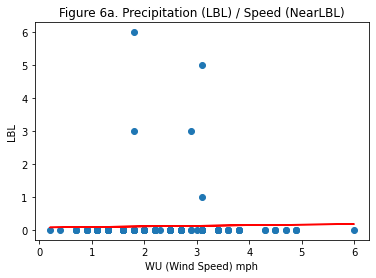

In [8]:
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.title("Figure 6a. Precipitation (LBL) / Speed (NearLBL)")
plt.xlabel('WU (Wind Speed) mph')
plt.ylabel("LBL")
plt.savefig('LBL_NEARLBL_SPEED.svg')
plt.show()


In [13]:
plt.savefig('Etch_Temp_06_08.svg')

<Figure size 432x288 with 0 Axes>

In [5]:
from scipy import stats
#import scipy

In [9]:
#stats.t.sf(abs(tval), df=(len(newdf['(x1-x2)^2'])-1))
stats.t.sf(abs(tval), df=(len(newdf['(x1-x2)^2'])-1))*2

0.7278451386043252

In [21]:
x = stats.linregress(X, Y)

ValueError: too many values to unpack (expected 4)

In [13]:
from sklearn.metrics import r2_score 

In [14]:
R_square = r2_score(X, Y) 

In [15]:
R_square

-660.6944926236636

In [37]:
len(Y)

167

CHECK TWO


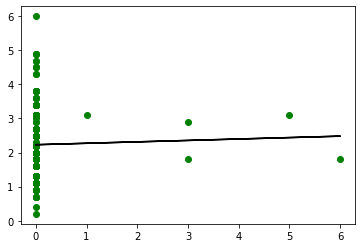

In [2]:

twoetchnew = etchroof.rename(columns = {"deviceTime_unix":"time"})
print('CHECK TWO')
#print(twoetchnew)
#twoetchnew['time'] = twoetchnew['time'].str.split().str[1]
#twoetchnew.drop(index=twoetchnew.index[0], axis=0, inplace=True)
twoetch = twoetchnew.reset_index()
twoetchnew = twoetch.loc[1:len(choppedDF.index)]
#print(twoetchnew)
#twoetchnew = twoetchnew.loc[1:167]
frameOne = twoetchnew
frameTwo = choppedDF
#newnewdf = newdf.loc[1:167]
tofaren = lambda x: (x*1.8)+32

#  (*********************************
#### BINNING DATA - FROM LABMETHODS.PY -----


data1 = frameOne
data2 = frameTwo
data1 = data1.set_index(['deviceTime_local'])
data1.index = pd.to_datetime(data1.index, unit='s')
data2 = data2.set_index(['time'])
data2.index = pd.to_datetime(data2.index, unit='s')

rebin = 5
data1_binned = data1.resample(str(rebin)+"T", label='right').mean().reset_index()
data2_binned = data2.resample(str(rebin)+"T", label='right').mean().reset_index()
   
if len(data1_binned) > len(data2_binned):
    data1_binned = data1_binned.drop(data1_binned.index[len(data2_binned):])
elif len(data2_binned) > len(data1_binned):
    data2_binned = data2_binned.drop(data2_binned.index[len(data1_binned):])

inds1 = pd.isnull(data1_binned).any(1).to_numpy().nonzero()[0]
inds2 = pd.isnull(data2_binned).any(1).to_numpy().nonzero()[0]

indsnan = np.concatenate([inds1,inds2])
indsnan = np.unique(indsnan)

j = len(indsnan)-1

while (j>=0):
    data1_binned = data1_binned.drop(data1_binned.index[indsnan[j]])
    data2_binned = data2_binned.drop(data2_binned.index[indsnan[j]])
    j = j-1
    
frameOne = data1_binned
frameTwo = data2_binned

#  ****************************)

""" 
checktime = pd.DataFrame()
checktime.insert(0, 'timeOne', frameOne['time'])
checktime.insert(0, 'timeTwo', col0)
checktime['timeOne'] = checktime['timeOne'].apply(lambda x: int(x))
checktime['timeTwo'] =checktime['timeTwo'].apply(lambda x: int(x))
xyz = timeCheck(checktime)
if (xyz == 0):
    pass
else:
    frameOne = frameOne.loc[1:len(xyz.index)]
    frameTwo = frameTwo.loc[1:len(xyz.index)]
    print('times adjusted...')
"""
col0 = frameOne['deviceTime_local']
frameOne[varia2.lower()] = frameOne[varia2.lower()].astype(float)
frameTwo[varia.lower()] = frameTwo[varia.lower()].astype(float)

#print(frameTwo['Temperature1'])

col1 = frameOne[varia2.lower()]
col2 = frameTwo[varia.lower()]
#print(col0)
#print(frameTwo['Pressure1'])
#print(frameTwo['Temperature1'])
newdf.insert(0, varia.capitalize(), col1)
newdf.insert(1, varia2.lower(), col2)
newdf.insert(2,'Time',col0)
#newdf = newdf.drop(0)
#newdf = newdf.drop(0)
#newdf = newdf.drop(148)
newdf['x1-x2'] = newdf[varia.capitalize()] - newdf[varia2.lower()]
sumtemps = newdf['x1-x2'].sum()
newdf["(x1-x2)^2"] = newdf['x1-x2'].apply(lambda x: x**2)
squaredtemps = newdf['(x1-x2)^2'].sum()
tval = (sumtemps/len(newdf.index))/((squaredtemps-(squaredtemps/len(newdf.index)))/((len(newdf.index)-1)*len(newdf.index))**0.5)
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

X = newdf.iloc[:, 0].values.reshape(-1, 1)
Y = newdf.iloc[:, 1].values.reshape(-1, 1) 
#X = tofaren(X)
linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X) 
plt.scatter(X, Y, color='g')
plt.plot(X, Y_pred, color='k')
plt.show()

#print("X-axis:Etcheverry Roof Data")
#print("Y-axis: WUnderground Station #KCABERKE108")

In [ ]:
tval

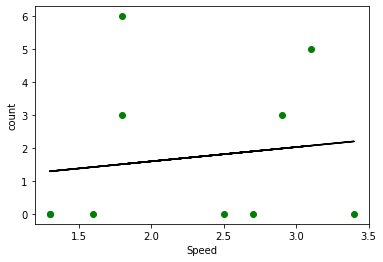

In [3]:
Y = newdf.iloc[120:130, 0].values.reshape(-1, 1)
X = newdf.iloc[120:130, 1].values.reshape(-1, 1) 
#X = tofaren(X)
linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X) 
plt.scatter(X, Y, color='g')
plt.plot(X, Y_pred, color='k')
plt.xlabel(varia)
plt.ylabel(varia2)
plt.show()

-0.348603695011431

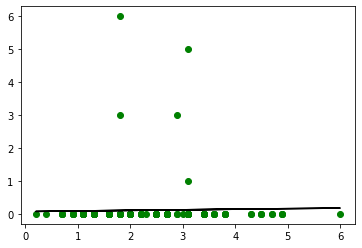

In [3]:
Y = newdf.iloc[:, 0].values.reshape(-1, 1)
X = newdf.iloc[:, 1].values.reshape(-1, 1) 
#X = tofaren(X)
linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X) 
plt.scatter(X, Y, color='g')
plt.plot(X, Y_pred, color='k')
plt.show()


In [10]:
tval

-0.348603695011431

In [14]:
stats.t.sf(abs(tval), df=(len(newdf['(x1-x2)^2'])-1))*2

0.7278451386043252

In [12]:
newdf

,Speed,count,Time,x1-x2,(x1-x2)^2
0,0.0,1.3,2022-07-21 07:10:00,-1.3,1.69
1,0.0,2.0,2022-07-21 07:15:00,-2.0,4.00
2,0.0,1.3,2022-07-21 07:20:00,-1.3,1.69
3,0.0,2.5,2022-07-21 07:25:00,-2.5,6.25
4,0.0,3.1,2022-07-21 07:30:00,-3.1,9.61
...,...,...,...,...,...
163,0.0,1.6,2022-07-21 20:45:00,-1.6,2.56
164,0.0,2.2,2022-07-21 20:50:00,-2.2,4.84
166,0.0,2.2,2022-07-21 21:00:00,-2.2,4.84
167,0.0,1.6,2022-07-21 21:05:00,-1.6,2.56


In [13]:
tval

-0.348603695011431

In [5]:

#twoetchnew['deviceTime_newlocal'] = twoetchnew['deviceTime_unix']
# .apply(lambda x: datetime.fromtimestamp(x).strftime("%H:%M"))

#twoetchnew = twoetchnew.drop('deviceTime_utc', axis = 1)
#twoetchnew = twoetchnew.drop('deviceTime_local', axis = 1)
twoetch = twoetch.rename(columns={"deviceTime_unix": "time"})
print('CHECK TWO')
# print(twoetchnew)
#twoetchnew['time'] = twoetchnew['time'].str.split().str[1]
#twoetchnew.drop(index=twoetchnew.index[0], axis=0, inplace=True)
twoetch = twoetch.reset_index()
twoetch = twoetch.loc[1:len(choppedDF.index)]
# print(twoetchnew)
#twoetchnew = twoetchnew.loc[1:167]
frameOne = twoetchnew
frameTwo = choppedDF
#newnewdf = newdf.loc[1:167]
def tofaren(x): return (x*1.8)+32

#  (*********************************
# BINNING DATA - FROM LABMETHODS.PY -----


data1 = frameOne
data2 = frameTwo
data1 = data1.set_index(['time'])
data1.index = pd.to_datetime(data1.index, unit='s')
data2 = data2.set_index(['time'])
data2.index = pd.to_datetime(data2.index, unit='s')

rebin = 5
data1_binned = data1.resample(
    str(rebin)+"T", label='right').mean().reset_index()
data2_binned = data2.resample(
    str(rebin)+"T", label='right').mean().reset_index()

if len(data1_binned) > len(data2_binned):
    data1_binned = data1_binned.drop(data1_binned.index[len(data2_binned):])
elif len(data2_binned) > len(data1_binned):
    data2_binned = data2_binned.drop(data2_binned.index[len(data1_binned):])

inds1 = pd.isnull(data1_binned).any(1).to_numpy().nonzero()[0]
inds2 = pd.isnull(data2_binned).any(1).to_numpy().nonzero()[0]

indsnan = np.concatenate([inds1, inds2])
indsnan = np.unique(indsnan)

j = len(indsnan)-1
while (j >= 0):
    data1_binned = data1_binned.drop(data1_binned.index[indsnan[j]])
    data2_binned = data2_binned.drop(data2_binned.index[indsnan[j]])
    j = j-1

frameOne = data1_binned
frameTwo = data2_binned

#  ****************************)
""" 
checktime = pd.DataFrame()
checktime.insert(0, 'timeOne', frameOne['time'])
checktime.insert(0, 'timeTwo', col0)
checktime['timeOne'] = checktime['timeOne'].apply(lambda x: int(x))
checktime['timeTwo'] =checktime['timeTwo'].apply(lambda x: int(x))
xyz = timeCheck(checktime)
if (xyz == 0):
    pass
else:
    frameOne = frameOne.loc[1:len(xyz.index)]
    frameTwo = frameTwo.loc[1:len(xyz.index)]
    print('times adjusted...')
"""
col0 = frameOne['time']
frameOne[varia2.lower()] = frameOne[varia2.lower()].astype(float)
frameTwo[varia.lower()] = frameTwo[varia.lower()].astype(float)

# print(frameTwo['Temperature1'])

col1 = frameOne[varia2.lower()]
col2 = frameTwo[varia.lower()]
# print(col0)
# print(frameTwo['Pressure1'])
# print(frameTwo['Temperature1'])
newdf.insert(0, varia.capitalize(), col1)
newdf.insert(1, varia2.lower(), col2)
newdf.insert(2, 'Time', col0)
#newdf = newdf.drop(0)
#newdf = newdf.drop(0)
#newdf = newdf.drop(148)
newdf['x1-x2'] = newdf[varia.capitalize()] - newdf[varia2.lower()]
sumtemps = newdf['x1-x2'].sum()
newdf["(x1-x2)^2"] = newdf['x1-x2'].apply(lambda x: x**2)
squaredtemps = newdf['(x1-x2)^2'].sum()
tval = (sumtemps/len(newdf.index))/((squaredtemps-(squaredtemps /
                                                   len(newdf.index)))/((len(newdf.index)-1)*len(newdf.index))**0.5)

X = newdf.iloc[:, 0].values.reshape(-1, 1)
Y = newdf.iloc[:, 1].values.reshape(-1, 1)
X = tofaren(X)


linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

NameError: name 'twoetch' is not defined